## Target audience
- Target audience: People who're interested in standup comedy and want to explore it more
- Familiarity with your topic? If not, how do we catch them up?
- Do they care? Why? Why not?
- What do you want them to take away? Key points?
- What do they know about visualization? Are your techniques standard?
- How do they encounter your visualization?
- Mathematical background? Are you assuming too much? Too little?
- Device? Mobile phone, computer, print media...


In [43]:
import numpy as np
import pandas as pd

data = pd.read_csv('ali-wong.csv')
data

,start,stop,caption,laugh,group,timeStart,timeStop
0,0:00:28,0:00:32,Hi. Hello! Welcome! Thank you!,0.0,0-intro,28,32
1,0:00:32,0:00:35,Thank you for coming. Hello!,0.0,0-intro,32,35
2,0:00:35,0:00:37,Hello.,0.0,0-intro,35,37
3,0:00:37,0:00:41,"We are gonna have to get this shit over with,",0.0,0-intro,37,41
4,0:00:41,0:00:44,"cause I have to pee in, like, ten minutes.",2.0,0-intro,41,44
...,...,...,...,...,...,...,...
920,0:58:34,0:58:39,Oh! Maybe because he went to Harvard Business ...,1.5,912-debt,3514,3519
921,0:58:39,0:58:43,the epicenter of white-collar crime. He Enron'...,1.5,912-debt,3519,3523
922,0:58:43,0:58:47,"And now, if I don't work, we die.",2.5,912-debt,3523,3527
923,0:58:48,0:58:52,Why else do you think I'm performing seven and...,3.0,912-debt,3528,3532


In [44]:
data['topic'] = data['group'].str.extract(r'-(.*)')
data['timeStart'] = data['timeStart']
data['timeStop'] = data['timeStop']
data.to_csv('ali-wong-edited.csv')

In [45]:
#df_edited = data.groupby('group').agg({'timeStart': 'min', 'timeStop': 'max'}).reset_index().sort_values('timeStart').reset_index().drop('index', axis=1)

In [74]:
df = pd.DataFrame(columns=['start', 'stop', 'topic', 'laugh'])
curr_topic = ''
curr_min = 0
curr_laughs = 0
for index, row in data.iterrows():
    if row['group'] != curr_topic:
        # add a new row for current topic
        temp = pd.DataFrame({'start': curr_min, 'stop': row['timeStart'], 'topic': row['group'], 'laugh': curr_laughs}, index=[0])
        df = pd.concat([df, temp])
        curr_min = row['timeStart']
        curr_topic = row['group']
        curr_laughs = row['laugh']
    else:
        curr_laughs += row['laugh']
        
df['topic'] = df['topic'].str.extract(r'-(.*)')

In [76]:
df.to_csv('ali-wong-edited.csv')

In [68]:
temp = pd.DataFrame({'start': curr_min, 'stop': row['timeStart'], 'topic': row['group']}, index=[0])
temp       

,start,stop,topic
0,3532,3532,904-conclusion


<AxesSubplot:>

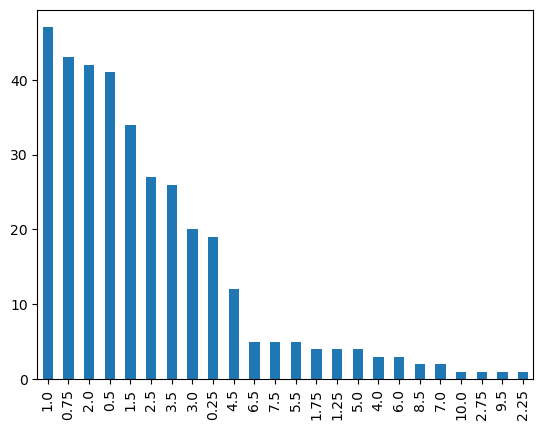

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
data['laugh'].value_counts().iloc[1:].plot(ax=ax, kind='bar')

In [11]:
laughs_avg = 2
punchlines = " ".join(data[data['laugh'] > laughs_avg]['caption'].values)
punchlines

'is "Fuck you."  and then they take a shit and have a six-pack, right? [vocalizing]  just cluttering your mind. They just go to sleep in peace at night. If you don\'t have it yet, you go and get it. and says, "Boo"! in women\'s bodies.  Very helpful, this doctor, right? or you\'re in the presence of Wolverine, bitches. when you\'re busy stuffing gold up your butt manual. It could graph.  that\'s not the way for me to achieve my optimum level of success." To a man who now has HPV.  Stop dating skaters unless you wanna wake up on a mattress in a kitchen. And I was like, "Oh, my God, I\'m gonna trap his ass." that your body is a secret garden." When, really, it\'s a public park... ...that has hosted many reggae fests... Is that beard for fashion or for warmth? Again"!  and all of that entitlement...  I\'m, like, "I could just crush your head at any moment, white man! Colonize the colonizer"! You know? and be racist together.  And we spend 100 percent of our time shitting on Korean people.

In [12]:
import re

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
bag_of_words = re.sub(r'[^\w\s]', '', punchlines.lower()).split(" ")
filtered_words = [word for word in bag_of_words if word not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /Users/js/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
pd.Series(filtered_words).value_counts()

              25
like          16
dont          10
im            10
know           7
              ..
feng           1
shui           1
house          1
pressuring     1
half           1
Length: 329, dtype: int64

In [15]:
pd.DataFrame({'topic': '861-double standard', 'reference': '111-met husband', 'times': 1}, index=[0])

,topic,reference,times
0,861-double standard,111-met husband,1


In [16]:
data.group.unique()

array(['0-intro', '6-getting older', '10-jealousy', '16-metabolism',
       '19-inner thigh clearance', '23-sleep', '32-hpv', '39-men and hpv',
       '43-doctor and hpv', '50-self-help', '59-hoarding',
       '62-blaming mom', '70-San Fransisco', '80-calculator',
       '96-marriage', '104-lucky', '105-skaters', '111-met husband',
       '124-trap men', '129-homeless', '130-hipsters',
       '150-Asian husband', '152-white guys', '166-hooking up',
       '176-racist', '182-korean', '187-cuban', '191-sexiest', '194-hair',
       '199-jewish', '204-odor', '207-racial bond', '219-growing up',
       '223-Vietnamese', '230-restaurant', '239-hippies', '248-gluten',
       '255-white people', '265-engagement', '271-proposing',
       '287-pinterest', '293-dress', '300-not working', '302-dependent',
       '316-feminism', '317-lean in', '326-play dumb', '344-options',
       '352-housewives', '361-office', '371-toilet cover',
       '377-toilet paper', '389-rushed wipe', '401-muffle',
      

In [2]:
data.dtypes

start         object
stop          object
caption       object
laugh        float64
group         object
timeStart      int64
timeStop       int64
dtype: object

In [17]:
data = pd.concat([data, data['group'].str.extract(r'(\d+)-([A-z]+)').rename(lambda x: ['group_id', 'group_topic'][x], axis=1)], axis=1)

In [22]:
data = data.assign(duration= data['timeStop'] - data['timeStart'])

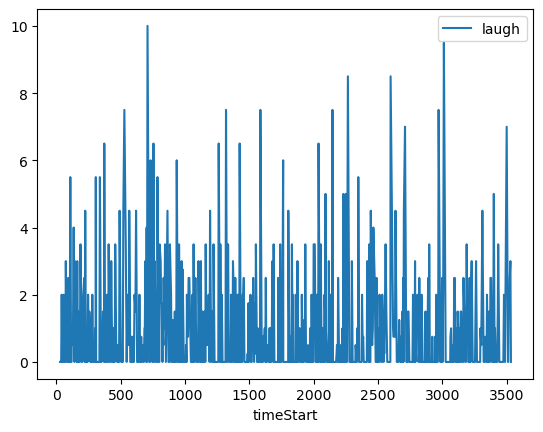

In [31]:
data[['timeStart', 'laugh']].set_index('timeStart').plot();

In [34]:
data.iloc[data['laugh'].argmax()]

start                                     0:11:48
stop                                      0:11:51
caption        Colonize the colonizer"! You know?
laugh                                        10.0
group                              166-hooking up
timeStart                                     708
timeStop                                      711
group_id                                      166
group_topic                               hooking
duration                                        3
Name: 175, dtype: object

<AxesSubplot:xlabel='group'>

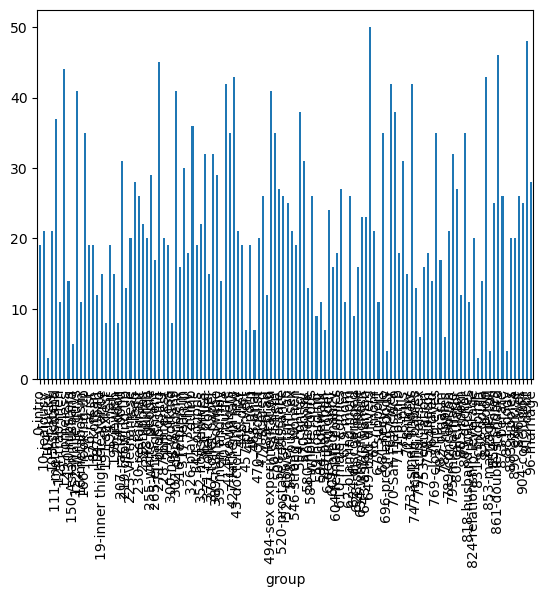

In [26]:
data.groupby('group').aggregate(sum)['duration'].plot.bar()